# 01_PL_03_Tessellation_network

The notebook uses function network_from_tessellation() to __create the tessellations network.__ 
* __NOTE:__ The final used tessellations were created using notebook __01_PL_03b_create_tessellations_network.ipynb__

In [25]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import time

import utils.analysis as an

# Zonas Medellin

In [26]:
zo = ['floresta_HH','moravia_LH','aguacatala_HL']
z = zo[2]

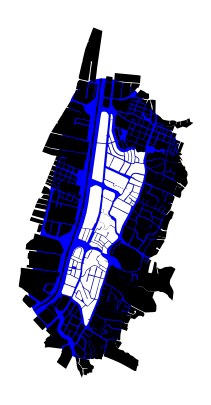

In [27]:
# Manzanas iniciales
zone_blocks = gpd.read_file(f'../data/output/shape/zone_blocks/{z}/{z}_blocks.shp')
zone_blocks = zone_blocks.to_crs('epsg:32618')

# Generar el poligono ampliado de la zona de analisis con un buffer
poligono_ampliado = zone_blocks.union_all().convex_hull.buffer(500)
poligono_ampliado_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries([poligono_ampliado]), crs=zone_blocks.crs)

# Seleccionar las manzanas de todo el territorio que caen dentro del poligono ampliado
blocks = gpd.read_file('../data/output/shape/blocks/medellin_blocks.shp')
blocks = blocks.to_crs('epsg:32618')
blocks = blocks[['MANZ_CCNCT','geometry']]
# buildings = blocks[blocks.geometry.within(poligono_ampliado)]
buildings = blocks[blocks.geometry.intersects(poligono_ampliado)]

# Agregar el rio truncado por el poligono de la zona
rio = gpd.read_file('../data/input/shape/rio_medellin/rio_medellin.shp')
rio = rio.to_crs('epsg:32618')
data_rio = {'MANZ_CCNCT':'0','geometry':rio.loc[0,'geometry']}
rio_gdf = gpd.GeoDataFrame([data_rio], crs=blocks.crs)
rio_truncado_gdf = poligono_ampliado_gdf.overlay(rio_gdf, how='intersection')
buildings = gpd.pd.concat([buildings, rio_truncado_gdf], ignore_index=True)

f, ax = plt.subplots(figsize=(5, 5))
poligono_ampliado_gdf.plot(ax=ax, color='b', zorder=1)
buildings.plot(ax=ax, color='k', zorder=2)
zone_blocks.plot(ax=ax, color='w', zorder=3)
ax.set_axis_off()
plt.show()

In [28]:
# start = time.time()

# buildings = buildings.set_index('MANZ_CCNCT')
# nodes, edges, tess = an.network_from_tessellation_ig_rtree(buildings)

# end = time.time()
# print(f'Computing time: {np.round(end-start,4)} seg')

In [29]:
buildings = buildings.set_index('MANZ_CCNCT')
nodes, edges, tess = an.network_from_tessellation(buildings, buildings.crs)

In [30]:
# fig, ax = ox.plot.plot_graph(G, figsize=(15,15), node_size=1, node_color='r', edge_linewidth=0.5, bgcolor='w', edge_color='gray')

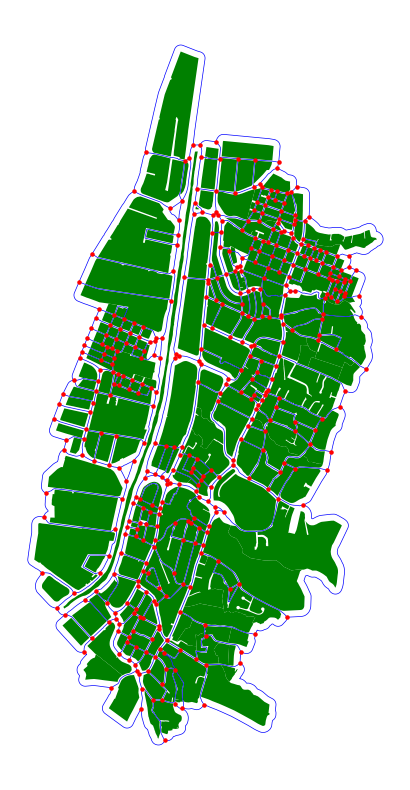

In [31]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, color='g', zorder=1)
nodes.plot(ax=ax, color='red', markersize=5, zorder=3)
edges.plot(ax=ax, color='blue', linewidth=0.5, zorder=2)
ax.set_axis_off()
plt.show()

In [32]:
nodes = nodes.to_crs('epsg:4326')
edges = edges.to_crs('epsg:4326')
nodes.to_file(f'../data/output/shape/network_tessellations/{z}/{z}_tessellations_nodes.shp')
edges.to_file(f'../data/output/shape/network_tessellations/{z}/{z}_tessellations_edges.shp')

tess = tess.to_crs('epsg:4326')
tess.to_file(f'../data/output/shape/network_tessellations/{z}/{z}_tessellations.shp')

C:\Users\Sergio\AppData\Local\Temp\ipykernel_8140\2276260917.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nodes.to_file(f'../data/output/shape/network_tessellations/{z}/{z}_tessellations_nodes.shp')
c:\Users\Sergio\anaconda3\envs\ox_eafit\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'streets_count' to 'streets_co'
  ogr_write(
c:\Users\Sergio\anaconda3\envs\ox_eafit\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'street_count' to 'street_cou'
  ogr_write(


# Zonas Guadalajara

In [ ]:
# zo = ['miramar_LH','colinas_HL','providencia_HH']
# z = zo[0]

In [ ]:
# # Manzanas iniciales (ya estan en un sistema projectado)
# zone_blocks = gpd.read_file(f'../data/output/shape/zone_blocks/{z}/{z}_blocks.shp')
# zone_blocks = zone_blocks.to_crs('epsg:32613')

# # Generar el poligono ampliado de la zona de analisis con un buffer
# # poligono_ampliado = zone_blocks.unary_union.convex_hull.buffer(500)
# poligono_ampliado = zone_blocks.union_all().convex_hull.buffer(500)
# poligono_ampliado_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries([poligono_ampliado]), crs=zone_blocks.crs)

# # Seleccionar las manzanas de todo el territorio que caen dentro del poligono ampliado
# blocks = gpd.read_file('../data/output/shape/blocks/guadalajara_blocks.shp')
# blocks = blocks[['CVEGEO','geometry']]
# # buildings = blocks[blocks.geometry.within(poligono_ampliado)]
# buildings = blocks[blocks.geometry.intersects(poligono_ampliado)]

# f, ax = plt.subplots(figsize=(5, 5))
# poligono_ampliado_gdf.plot(ax=ax, color='b', zorder=1)
# buildings.plot(ax=ax, color='k', zorder=2)
# zone_blocks.plot(ax=ax, color='w', zorder=3)
# ax.set_axis_off()
# plt.show()

In [ ]:
# start = time.time()

# buildings = buildings.set_index('CVEGEO')
# nodes, edges, tess = an.network_from_tessellation_ig_rtree(buildings)
# # tess = network_from_tessellation_ig_rtree(buildings)

# end = time.time()
# print(f'Computing time: {np.round(end-start,4)} seg')

In [ ]:
# f, ax = plt.subplots(figsize=(10, 10))
# buildings.plot(ax=ax, color='g', zorder=1)
# nodes.plot(ax=ax, color='red', markersize=5, zorder=3)
# edges.plot(ax=ax, color='blue', linewidth=0.5, zorder=2)
# ax.set_axis_off()
# plt.show()

In [ ]:
# nodes = nodes.to_crs('epsg:4326')
# nodes.to_file(f'../data/output/shape/network_tessellations/{z}/{z}_tessellations_nodes.shp')
# edges.to_file(f'../data/output/shape/network_tessellations/{z}/{z}_tessellations_edges.shp')

# tess = tess.to_crs('epsg:4326')
# tess.to_file(f'../data/output/shape/network_tessellations/{z}/{z}_tessellations.shp')

# Todas las manzanas Medellin

In [ ]:
# # Seleccionar las manzanas de todo el territorio que caen dentro del poligono ampliado
# blocks = gpd.read_file('../data/output/shape/blocks/medellin_blocks.shp')
# blocks = blocks.to_crs('epsg:32618')
# blocks = blocks[['MANZ_CCNCT','geometry']]

# # Generar el poligono ampliado de la zona de analisis con un buffer
# poligono_ampliado = blocks.union_all().convex_hull.buffer(500)
# poligono_ampliado_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries([poligono_ampliado]), crs=blocks.crs)

# # Agregar el rio truncado por el poligono de la zona
# rio = gpd.read_file('../data/input/shape/rio_medellin/rio_medellin.shp')
# rio = rio.to_crs('epsg:32618')
# data_rio = {'MANZ_CCNCT':'0','geometry':rio.loc[0,'geometry']}
# rio_gdf = gpd.GeoDataFrame([data_rio], crs=blocks.crs)
# rio_truncado_gdf = poligono_ampliado_gdf.overlay(rio_gdf, how='intersection')
# buildings = gpd.pd.concat([blocks, rio_truncado_gdf], ignore_index=True)
# buildings = buildings.set_index('MANZ_CCNCT')

# f, ax = plt.subplots(figsize=(5, 5))
# poligono_ampliado_gdf.plot(ax=ax, color='b', zorder=1)
# buildings.plot(ax=ax, color='k', zorder=2)
# # blocks.plot(ax=ax, color='w', zorder=3)
# ax.set_axis_off()
# plt.show()

In [ ]:
# start = time.time()
# nodes, edges, tess = an.network_from_tessellation_ig_rtree(buildings)
# end = time.time()
# print(f'Computing time: {np.round((end-start)/60,4)} min')

In [ ]:
# nodes = nodes.to_crs('epsg:4326')
# edges = edges.to_crs('epsg:4326')
# nodes.to_file(f'../data/output/shape/network_tessellations/medellin/medellin_tessellations_nodes.shp')
# edges.to_file(f'../data/output/shape/network_tessellations/medellin/medellin_tessellations_edges.shp')

# tess = tess.to_crs('epsg:4326')
# tess.to_file(f'../data/output/shape/network_tessellations/medellin/medellin_tessellations.shp')

# Todas las manzanas Guadalajara

In [ ]:
# # Seleccionar las manzanas de todo el territorio que caen dentro del poligono ampliado
# blocks = gpd.read_file('../data/output/shape/blocks/guadalajara_blocks.shp')
# blocks = blocks[['CVEGEO','geometry']]
# blocks = blocks.to_crs('epsg:32613')
# blocks = blocks.set_index('CVEGEO')

In [ ]:
# # start = time.time()
# nodes, edges = an.network_from_tessellation(blocks, blocks.crs)
# # end = time.time()
# # print(f'Computing time: {np.round((end-start)/60,4)} min')

In [ ]:
# nodes = nodes.to_crs('epsg:4326')
# edges = edges.to_crs('epsg:4326')
# nodes.to_file(f'../data/output/shape/network_tessellations/guadalajara/guadalajara_tessellations_nodes.shp')
# edges.to_file(f'../data/output/shape/network_tessellations/guadalajara/guadalajara_tessellations_edges.shp')